### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [15]:
data = pd.read_csv('../data/coupons.csv')
pd.set_option('display.max_columns', None)


In [13]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


# Utility Function - As suggested by Toby Gardner.

In [10]:
def summary_stats(df) -> pd.DataFrame:

    # Create base frame
    stats = pd.DataFrame(index=df.columns)

    stats["dtype"] = df.dtypes


    stats["sample_val"] = [df[col].dropna().sample(1).iloc[0]
                            if df[col].notna().any() else np.nan
                            for col in df.columns]

    stats["vals"] = df.count()
    stats["miss_pct"] = (df.isna().sum() / len(df) * 100).round(1)
    stats["unique"] = df.nunique()

    # Initiate Descriptive Stats
    for col in ["mean", "mode", "min", "max", "std", "skew", "kurtosis"]:
        stats[col] = np.nan

    # Compute stats for numeric columns
    num_cols = df.select_dtypes(include="number").columns

    for col in num_cols:
        s = df[col].dropna()
        if not s.empty:
            stats.at[col, "mean"] = s.mean()
            stats.at[col, "min"] = s.min()
            stats.at[col, "max"] = s.max()
            stats.at[col, "std"] = s.std()
            stats.at[col, "skew"] = s.skew().round(1)
            stats.at[col, "kurtosis"] = s.kurtosis().round(1)
            mode_vals = s.mode()
            stats.at[col, "mode"] = mode_vals.iloc[0] if not mode_vals.empty else np.nan

    # Rounding preferences for numeric stats (change this to suit dataset)
    round_cols = ["mean", "mode", "min", "max", "std"]
    stats[round_cols] = stats[round_cols].round(2)

    return stats

2. Investigate the dataset for missing or problematic data.

In [8]:
summary_stats(data)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
destination,object,No Urgent Place,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passanger,object,Alone,12684,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,object,Sunny,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,int64,30,12684,0.0,3,63.30,80.0,30.0,80.0,19.15,-0.6,-1.0
time,object,2PM,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupon,object,Coffee House,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,object,1d,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,object,Male,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,object,50plus,12684,0.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalStatus,object,Single,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:lightblue;">
# Notes / Findings on summary stats

| Column               | Missing Values | % Missing  |
| -------------------- | -------------- | ---------- |
| **car**              | 12,576         | **99.15%** |
| CoffeeHouse          | 217            | 1.71%      |
| Restaurant20To50     | 189            | 1.49%      |
| CarryAway            | 151            | 1.19%      |
| RestaurantLessThan20 | 130            | 1.02%      |
| Bar                  | 107            | 0.84%      |

The column Car seems to be missing 99.1% of data and hence this colum cannot be used in any meaningful way. 

Coupon frequency columns (CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, Bar) → Each has about 1–2% missing values, which can be:
* Dropped (rows removed), or
* Imputed (e.g., replace with "Never" or "Unknown" depending on context). I decided to go with "Never" to keep it cosistant.

All other columns have complete data (0% missing).
</span>

3. Decide what to do about your missing data -- drop, replace, other...

In [18]:
# --- Data Cleaning ---

# 1. Drop 'car' column (too many missing values ~99%)
if 'car' in data.columns:
    data = data.drop(columns=['car'])

# 2. Handle missing values in coupon frequency columns
# Strategy: Replace NaN with "Never" (meaning customer never visits / didn't report visiting)
cols_to_fill = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']
data[cols_to_fill] = data[cols_to_fill].fillna('never')

summary_stats(data)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
destination,object,No Urgent Place,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passanger,object,Friend(s),12684,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,object,Sunny,12684,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,int64,80,12684,0.0,3,63.30,80.0,30.0,80.0,19.15,-0.6,-1.0
time,object,7AM,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupon,object,Restaurant(20-50),12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,object,1d,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,object,Female,12684,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,object,50plus,12684,0.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalStatus,object,Single,12684,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. What proportion of the total observations chose to accept the coupon?



In [19]:
# Proportion of customers who accepted the coupon
acceptance_rate = data['Y'].mean()
print("Proportion who accepted the coupon:", round(acceptance_rate, 3))
print("Proportion who did not accept the coupon:", round(1 - acceptance_rate, 3))

# Overall acceptance rate
print("Overall acceptance rate:", round(acceptance_rate, 3))

# Acceptance rate by coupon type
acceptance_by_coupon = data.groupby('coupon')['Y'].mean().sort_values(ascending=False)

print("\nAcceptance rate by coupon type:")
print(acceptance_by_coupon)

Proportion who accepted the coupon: 0.568
Proportion who did not accept the coupon: 0.432
Overall acceptance rate: 0.568

Acceptance rate by coupon type:
coupon
Carry out & Take away    0.735478
Restaurant(<20)          0.707107
Coffee House             0.499249
Restaurant(20-50)        0.441019
Bar                      0.410015
Name: Y, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

C:\Users\ranga\AppData\Local\Temp\ipykernel_38616\198580001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_by_coupon.index, y=acceptance_by_coupon.values, palette="Set2")


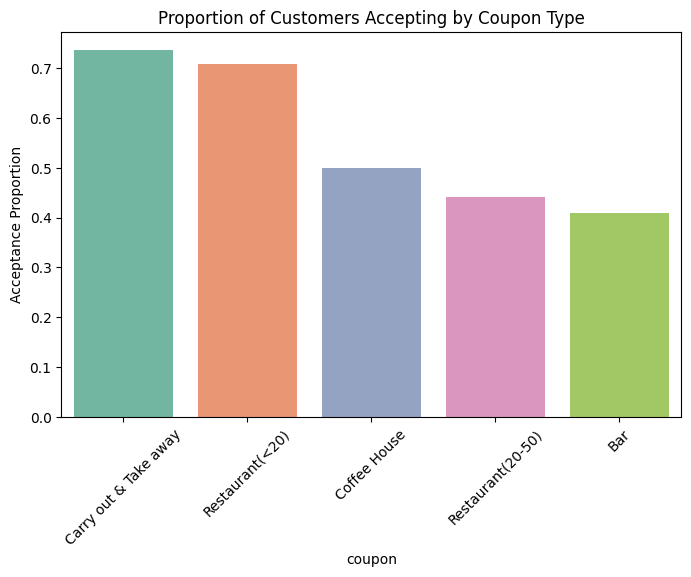

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x=acceptance_by_coupon.index, y=acceptance_by_coupon.values, palette="Set2")
plt.title("Proportion of Customers Accepting by Coupon Type")
plt.ylabel("Acceptance Proportion")
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

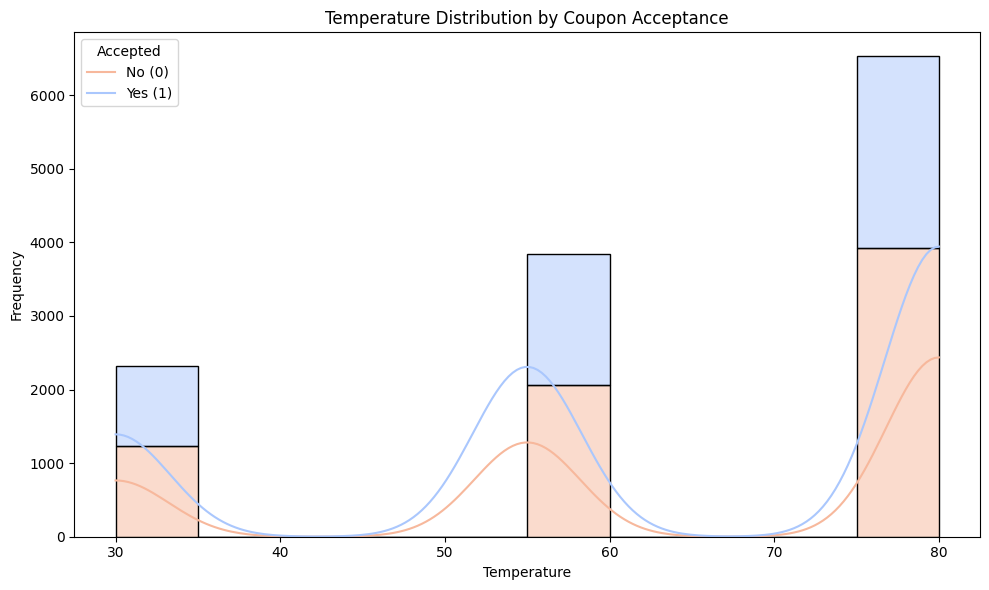

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='temperature', hue='Y', bins=10, kde=True, palette='coolwarm', multiple='stack')
plt.title('Temperature Distribution by Coupon Acceptance')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(title='Accepted', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
df_bar = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [23]:
accepted_proportion = df_bar['Y'].mean()
print(f"Proportion of bar coupons accepted: {accepted_proportion:.2f}")

Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
# Create two groups based on bar visit frequency
low_freq = df_bar[df_bar['Bar'] <= 'less than 4 times']
high_freq = df_bar[df_bar['Bar'] > 'less than 4 times']

# Calculate acceptance rates
low_freq_rate = low_freq['Y'].mean()
high_freq_rate = high_freq['Y'].mean()

print(f"Acceptance rate for <= 3 visits/month: {low_freq_rate:.2f}")
print(f"Acceptance rate for > 3 visits/month: {high_freq_rate:.2f}")


Acceptance rate for <= 3 visits/month: 0.69
Acceptance rate for > 3 visits/month: 0.29


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [45]:
print(f"Sorted unique values in age column => {sorted(data['age'].unique())}")

# Map age categories to numeric values
# I am going to call any age "50plus" as 55 for simplicity
# I am going to call any age "below21" as 20 for simplicity

age_map = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 55
}

# Map bar visit frequency to numeric values
bar_map = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

# Apply the mapping
data['bar_freq'] = data['Bar'].map(bar_map)
data['age_num'] = data['age'].map(age_map)

# Define target group — bargoers' > once/month and age > 25
target_group = data[
    ((data['bar_freq'] == 2) |(data['bar_freq'] == 6) | (data['bar_freq'] == 10)) &
    (data['age_num'] > 25)
]

# Define comparison group — all others
comparison_group = data.drop(target_group.index)

# Calculate acceptance rates
target_acceptance = target_group['Y'].mean()
comparison_acceptance = comparison_group['Y'].mean()

print(f"Acceptance rate (bar-goers > once/month & age > 25): {target_acceptance:.2f}")
print(f"Acceptance rate (all others): {comparison_acceptance:.2f}")


Sorted unique values in age column => ['21', '26', '31', '36', '41', '46', '50plus', 'below21']
Acceptance rate (bar-goers > once/month & age > 25): 0.62
Acceptance rate (all others): 0.55


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [47]:
print(f"Sorted unique values in occupation column => {sorted(data['occupation'].unique())}")
print(f"Sorted unique values in Bar column => {sorted(data['Bar'].unique())}")


# Map bar visit frequency to numeric values
bar_map = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

# Apply the mapping
data['bar_freq'] = data['Bar'].map(bar_map)

# Define Group A: bar-goers > once/month, not driving with kids, not in farming/fishing/forestry
group_a = data[
    (data['bar_freq'] > 1) &
    (data['passanger'] != 'Kid(s)') & (data['passanger'] != 'Alone') &
    (data['occupation'] != 'Farming Fishing and Forestry')
]
print(f"Group A size: {len(group_a)}")

# Define Group B: all others
group_b = data.drop(group_a.index)

# Calculate acceptance rates
group_a_acceptance = group_a['Y'].mean()
group_b_acceptance = group_b['Y'].mean()

print(f"Acceptance rate (Group A): {group_a_acceptance:.2f}")
print(f"Acceptance rate (Group B): {group_b_acceptance:.2f}")


Sorted unique values in occupation column => ['Architecture & Engineering', 'Arts Design Entertainment Sports & Media', 'Building & Grounds Cleaning & Maintenance', 'Business & Financial', 'Community & Social Services', 'Computer & Mathematical', 'Construction & Extraction', 'Education&Training&Library', 'Farming Fishing & Forestry', 'Food Preparation & Serving Related', 'Healthcare Practitioners & Technical', 'Healthcare Support', 'Installation Maintenance & Repair', 'Legal', 'Life Physical Social Science', 'Management', 'Office & Administrative Support', 'Personal Care & Service', 'Production Occupations', 'Protective Service', 'Retired', 'Sales & Related', 'Student', 'Transportation & Material Moving', 'Unemployed']
Sorted unique values in Bar column => ['1~3', '4~8', 'gt8', 'less1', 'never']
Group A size: 1414
Acceptance rate (Group A): 0.69
Acceptance rate (Group B): 0.55


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [29]:
print(f"Sorted unique values in income column => {sorted(data['income'].unique())}")

rest_map = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2.5,
    '4~8': 6,
    'gt8': 10
}

data['cheap_rest_freq'] = data['RestaurantLessThan20'].map(rest_map)

condition_1 = (
    (data['bar_freq'] > 1) &
    (data['passanger'] != 'Kid(s)') & (data['passanger'] != 'Alone') &
    (data['maritalStatus'] != 'Widowed')
)

condition_2 = (
    (data['bar_freq'] > 1) &
    (data['age_num'] < 30)
)

condition_3 = (
    (data['cheap_rest_freq'] > 4) &
    (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

target_group = data[condition_1 | condition_2 | condition_3]
comparison_group = data.drop(target_group.index)

target_acceptance = target_group['Y'].mean()
comparison_acceptance = comparison_group['Y'].mean()

print(f"Acceptance rate (target group): {target_acceptance:.2f}")
print(f"Acceptance rate (comparison group): {comparison_acceptance:.2f}")


Sorted unique values in income column => ['$100000 or More', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', 'Less than $12500']
Acceptance rate (target group): 0.61
Acceptance rate (comparison group): 0.54


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Hypothesis: Characteristics of Drivers Who Accept Bar Coupons
Drivers who accepted bar coupons tend to exhibit social, mobile, and lifestyle-driven behaviors, specifically:

* Frequent social outings: They go to bars more than once a month, suggesting a higher likelihood of engaging in leisure activities.

* Non-family travel context: They are less likely to be driving with children, indicating adult-oriented outings where bar coupons are more relevant.

* Younger or socially active age group: Many are under 30 or in age brackets associated with higher social mobility and discretionary spending.

* Non-rural occupations: They are not in farming, fishing, or forestry—professions typically linked to rural settings and lower exposure to urban promotions.

* Budget-conscious dining habits: Those who dine at cheap restaurants more than 4 times a month and earn less than $50K may be more receptive to discounts and incentives.

# Strategic Insight
This profile suggests that bar coupons are most effective when targeted at:

* Urban, younger professionals

* Social drivers without children

* Income-sensitive but lifestyle-oriented consumers

# Define the Hypothesis
Null Hypothesis (H₀): The specified behavioral and demographic traits do not significantly influence bar coupon acceptance.

Alternative Hypothesis (H₁): Drivers who go to bars more than once a month, travel without kids, are not widowed, are under 30, or dine at cheap restaurants frequently with income < $50K are more likely to accept bar coupons.

In [30]:

rest_map = bar_map.copy()

data['bar_freq'] = data['Bar'].map(bar_map)
data['cheap_rest_freq'] = data['RestaurantLessThan20'].map(rest_map)


data['age_num'] = data['age'].map(age_map)

# Create binary features for hypothesis conditions
data['condition_1'] = (
    (data['bar_freq'] > 1) &
    (data['passanger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
).astype(int)

data['condition_2'] = (
    (data['bar_freq'] > 1) &
    (data['age_num'] < 30)
).astype(int)

data['condition_3'] = (
    (data['cheap_rest_freq'] > 4) &
    (data['income'].isin([
        'Less than $12500', '$12500 - $24999',
        '$25000 - $37499', '$37500 - $49999'
    ]))
).astype(int)

# Combine conditions
data['target_group'] = (
    data['condition_1'] | data['condition_2'] | data['condition_3']
).astype(int)



X = data[['target_group']]
X = sm.add_constant(X)  # adds intercept
y = data['Y']  # coupon acceptance

model = sm.Logit(y, X).fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.681841
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                12684
Model:                          Logit   Df Residuals:                    12682
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                0.002794
Time:                        00:00:23   Log-Likelihood:                -8648.5
converged:                       True   LL-Null:                       -8672.7
Covariance Type:            nonrobust   LLR p-value:                 3.363e-12
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1730      0.023      7.480      0.000       0.128       0.218
target_group     0.2550

# Interpret the Results
* Coefficient for target_group: If positive and statistically significant (p-value < 0.05), it supports your hypothesis.

* Odds ratio: exp(coef) tells you how much more likely the target group is to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Carry out & Take away vs Coupon Accpetance.

In [35]:
df_CarryAway = data[data['coupon'] == 'Carry out & Take away']

accepted_proportion = df_CarryAway['Y'].mean()
print(f"Proportion of 'Carry out & Take away' coupons accepted: {accepted_proportion:.2f}")

Proportion of 'Carry out & Take away' coupons accepted: 0.74


In [37]:
# Create two groups based on bar visit frequency
low_freq = df_bar[df_bar['CarryAway'] <= 'less than 4 times']
high_freq = df_bar[df_bar['CarryAway'] > 'less than 4 times']

# Calculate acceptance rates
low_freq_rate = low_freq['Y'].mean()
high_freq_rate = high_freq['Y'].mean()

print(f"Acceptance rate for <= 3 visits/month: {low_freq_rate:.2f}")
print(f"Acceptance rate for > 3 visits/month: {high_freq_rate:.2f}")

Acceptance rate for <= 3 visits/month: 0.42
Acceptance rate for > 3 visits/month: 0.37


In [44]:
print(f"Sorted unique values in age column => {sorted(data['age'].unique())}")
print(f"Sorted unique values in age column => {sorted(data['CarryAway'].unique())}")

# Map age categories to numeric values
# I am going to call any age "50plus" as 55 for simplicity
# I am going to call any age "below21" as 20 for simplicity

age_map = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 55
}

carryAway_map = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

data['age_num'] = data['age'].map(age_map)
data['carryAway_freq'] = data['CarryAway'].map(carryAway_map)

# Define target group — bargoers' > once/month and age > 25
target_group = data[
    #((data['CarryAway'] == '4-8 times a month') | (data['CarryAway'] == 'more than 8 times a month')) &
    ((data['carryAway_freq'] == 2) |(data['carryAway_freq'] == 6) | (data['carryAway_freq'] == 10)) &
    (data['age_num'] > 25)
]

# Define comparison group — all others
comparison_group = data.drop(target_group.index)

# Calculate acceptance rates
target_acceptance = target_group['Y'].mean()
comparison_acceptance = comparison_group['Y'].mean()

print(f"Acceptance rate (Carry out & Take away > once/month & age > 25): {target_acceptance:.2f}")
print(f"Acceptance rate (all others): {comparison_acceptance:.2f}")

Sorted unique values in age column => ['21', '26', '31', '36', '41', '46', '50plus', 'below21']
Sorted unique values in age column => ['1~3', '4~8', 'gt8', 'less1', 'never']
Acceptance rate (Carry out & Take away > once/month & age > 25): 0.57
Acceptance rate (all others): 0.56


In [48]:
print(f"Sorted unique values in occupation column => {sorted(data['occupation'].unique())}")

# Map bar visit frequency to numeric values
bar_map = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

# Apply the mapping
data['carryAway_freq'] = data['Bar'].map(bar_map)

# Define Group A: bar-goers > once/month, not driving with kids, not in farming/fishing/forestry
group_a = data[
    (data['carryAway_freq'] > 1) &
    (data['passanger'] != 'Kid(s)') & (data['passanger'] != 'Alone') &
    (data['occupation'] != 'Farming Fishing and Forestry')
]
print(f"Group A size: {len(group_a)}")

# Define Group B: all others
group_b = data.drop(group_a.index)

# Calculate acceptance rates
group_a_acceptance = group_a['Y'].mean()
group_b_acceptance = group_b['Y'].mean()

print(f"Acceptance rate (Group A): {group_a_acceptance:.2f}")
print(f"Acceptance rate (Group B): {group_b_acceptance:.2f}")


Sorted unique values in occupation column => ['Architecture & Engineering', 'Arts Design Entertainment Sports & Media', 'Building & Grounds Cleaning & Maintenance', 'Business & Financial', 'Community & Social Services', 'Computer & Mathematical', 'Construction & Extraction', 'Education&Training&Library', 'Farming Fishing & Forestry', 'Food Preparation & Serving Related', 'Healthcare Practitioners & Technical', 'Healthcare Support', 'Installation Maintenance & Repair', 'Legal', 'Life Physical Social Science', 'Management', 'Office & Administrative Support', 'Personal Care & Service', 'Production Occupations', 'Protective Service', 'Retired', 'Sales & Related', 'Student', 'Transportation & Material Moving', 'Unemployed']
Group A size: 1414
Acceptance rate (Group A): 0.69
Acceptance rate (Group B): 0.55


In [50]:
print(f"Sorted unique values in income column => {sorted(data['income'].unique())}")

rest_map = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2.5,
    '4~8': 6,
    'gt8': 10
}

data['cheap_rest_freq'] = data['RestaurantLessThan20'].map(rest_map)

condition_1 = (
    (data['carryAway_freq'] > 1) &
    (data['passanger'] != 'Kid(s)') & (data['passanger'] != 'Alone') &
    (data['maritalStatus'] != 'Widowed')
)

condition_2 = (
    (data['carryAway_freq'] > 1) &
    (data['age_num'] < 30)
)

condition_3 = (
    (data['cheap_rest_freq'] > 4) &
    (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

target_group = data[condition_1 | condition_2 | condition_3]
comparison_group = data.drop(target_group.index)

target_acceptance = target_group['Y'].mean()
comparison_acceptance = comparison_group['Y'].mean()

print(f"Acceptance rate (target group): {target_acceptance:.2f}")
print(f"Acceptance rate (comparison group): {comparison_acceptance:.2f}")

Sorted unique values in income column => ['$100000 or More', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', 'Less than $12500']
Acceptance rate (target group): 0.61
Acceptance rate (comparison group): 0.54
